In [1]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
ticker = "MSFT"

In [3]:
file_path_message = f'LOBSTER_Data/{ticker}_2012-06-21_34200000_57600000_message_10'
Message_Data = pd.read_parquet(f"{file_path_message}.parquet")

column_names_message = ["Time", "Type", "Order_ID", "Size", "Price", "Direction"]
Message_Data.columns= column_names_message
reference_date = datetime(2012, 6, 21) 
Message_Data['Time'] = Message_Data['Time'].apply(
    lambda x: datetime.combine(reference_date, datetime.min.time()) + timedelta(seconds=x)
)
Message_Data['Price'] =Message_Data['Price']/10000
Message_Data.head()# , Message_Data.shape

,Time,Type,Order_ID,Size,Price,Direction
0,2012-06-21 09:30:00.013994,3,16085616,100,31.04,-1
1,2012-06-21 09:30:00.013994,1,16116348,100,31.05,-1
2,2012-06-21 09:30:00.015248,1,16116658,100,31.04,-1
3,2012-06-21 09:30:00.015442,1,16116704,100,31.05,-1
4,2012-06-21 09:30:00.015789,1,16116752,100,31.06,-1


In [4]:
file_path_ob = f'LOBSTER_Data/{ticker}_2012-06-21_34200000_57600000_orderbook_10'
OB_Data = pd.read_parquet(f"{file_path_ob}.parquet")
column_names_OB = []
for i in range(1, 11):  # 1 to 10
    column_names_OB.extend([
        f"ask_price_{i}", f"ask_size_{i}", 
        f"bid_price_{i}", f"bid_size_{i}"
    ])
OB_Data.columns = column_names_OB
price_columns = [f"ask_price_{i}" for i in range(1, 11)] + [f"bid_price_{i}" for i in range(1, 11)]
OB_Data[price_columns] = OB_Data[price_columns] / 10000
OB_Data['midprice'] = np.round((OB_Data['ask_price_1'] + OB_Data['bid_price_1'])/2, 3)
OB_Data['spread'] = np.round(OB_Data['ask_price_1'] - OB_Data['bid_price_1'], 2)
OB_Data.head()#, OB_Data.shape

,ask_price_1,ask_size_1,bid_price_1,bid_size_1,ask_price_2,ask_size_2,bid_price_2,bid_size_2,ask_price_3,ask_size_3,...,ask_price_9,ask_size_9,bid_price_9,bid_size_9,ask_price_10,ask_size_10,bid_price_10,bid_size_10,midprice,spread
0,30.99,3788,30.95,300,31.05,100,30.93,3986,31.06,100,...,31.13,100,30.85,400,31.14,100,30.84,1600,30.97,0.04
1,30.99,3788,30.95,300,31.05,200,30.93,3986,31.06,100,...,31.13,100,30.85,400,31.14,100,30.84,1600,30.97,0.04
2,30.99,3788,30.95,300,31.04,100,30.93,3986,31.05,200,...,31.11,4500,30.85,400,31.13,100,30.84,1600,30.97,0.04
3,30.99,3788,30.95,300,31.04,100,30.93,3986,31.05,300,...,31.11,4500,30.85,400,31.13,100,30.84,1600,30.97,0.04
4,30.99,3788,30.95,300,31.04,100,30.93,3986,31.05,300,...,31.11,4500,30.85,400,31.13,100,30.84,1600,30.97,0.04


In [5]:
merged_data = pd.concat([Message_Data, OB_Data], axis=1).reset_index(drop=True)
merged_data['event_type'] = np.nan
merged_data.head()

,Time,Type,Order_ID,Size,Price,Direction,ask_price_1,ask_size_1,bid_price_1,bid_size_1,...,ask_size_9,bid_price_9,bid_size_9,ask_price_10,ask_size_10,bid_price_10,bid_size_10,midprice,spread,event_type
0,2012-06-21 09:30:00.013994,3,16085616,100,31.04,-1,30.99,3788,30.95,300,...,100,30.85,400,31.14,100,30.84,1600,30.97,0.04,NaN
1,2012-06-21 09:30:00.013994,1,16116348,100,31.05,-1,30.99,3788,30.95,300,...,100,30.85,400,31.14,100,30.84,1600,30.97,0.04,NaN
2,2012-06-21 09:30:00.015248,1,16116658,100,31.04,-1,30.99,3788,30.95,300,...,4500,30.85,400,31.13,100,30.84,1600,30.97,0.04,NaN
3,2012-06-21 09:30:00.015442,1,16116704,100,31.05,-1,30.99,3788,30.95,300,...,4500,30.85,400,31.13,100,30.84,1600,30.97,0.04,NaN
4,2012-06-21 09:30:00.015789,1,16116752,100,31.06,-1,30.99,3788,30.95,300,...,4500,30.85,400,31.13,100,30.84,1600,30.97,0.04,NaN


## If we want to filter out US Market open and close data:

In [6]:
# # Create a mask for the time range between 9:45 and 15:45
# start_time = pd.to_datetime('09:45:00').time()  # Start time: 9:45
# end_time = pd.to_datetime('15:45:00').time()    # End time: 15:45

# # Filter the DataFrame for the rows where the 'Time' is between start_time and end_time
# merged_data = merged_data[(merged_data['Time'].dt.time >= start_time) & (merged_data['Time'].dt.time <= end_time)].reset_index(drop=True)
# merged_data

## Events to model
1. Aggressive buy LO -> midprice increases
2. Aggressive sell LO -> midprice decreases
3. Aggressive buy MO -> midprice increases
4. Aggressive sell MO -> midprice decreases
5. Aggressive buy cancellation -> midprice decreases
6. Aggressive sell cancellation -> midprice increases
7. Non-Aggressive buy LO -> midprice unchanged
8. Non-Aggressive sell LO -> midprice unchanged
9. Non-Aggressive buy MO -> midprice unchanged
10. Non-Aggressive sell MO -> midprice unchanged
11. Non-Aggressive buy cancellation -> midprice unchanged
12. Non-Aggressive sell cancellation -> midprice unchanged

## Type
1. Submission of a new LO
2. Cancellation (Partial deletion of LO)
3. Deletion (Total deletion of a LO)
4. Execution of a visible LO
5. Execution of a hidden LO
7) Trading halt indicator

In [7]:
merged_data = merged_data[merged_data['Type'] != 7] # Delete trading halt rows
merged_data['midprice_shifted'] = merged_data['midprice'].shift(1)

# Define conditions for LO_events
LO_entry_conditions = [
    (merged_data['Type'] == 1) & (merged_data['Direction'] == 1) 
    & (merged_data['midprice'] != merged_data['midprice_shifted']), # Aggressive buy LO
    (merged_data['Type'] == 1) & (merged_data['Direction'] == -1) 
    & (merged_data['midprice'] != merged_data['midprice_shifted']), # Aggressive sell LO
    (merged_data['Type'] == 1) & (merged_data['Direction'] == 1) 
    & (merged_data['midprice'] == merged_data['midprice_shifted']), # Nonaggressive buy LO
    (merged_data['Type'] == 1) & (merged_data['Direction'] == -1) 
    & (merged_data['midprice'] == merged_data['midprice_shifted']) # Nonaggressive sell LO
]
LO_entry_choices = [1, 2, 7, 8]

# Define conditions for MO_events
MO_entry_conditions = [
    ((merged_data['Type'] == 4) | (merged_data['Type'] == 5)) & (merged_data['Direction'] == 1) 
    & (merged_data['midprice'] != merged_data['midprice_shifted']), # Aggressive buy MO 
    ((merged_data['Type'] == 4) | (merged_data['Type'] == 5)) & (merged_data['Direction'] == -1) 
    & (merged_data['midprice'] != merged_data['midprice_shifted']), # Aggressive sell MO
    ((merged_data['Type'] == 4) | (merged_data['Type'] == 5)) & (merged_data['Direction'] == 1) 
    & (merged_data['midprice'] == merged_data['midprice_shifted']), # Nonaggressive buy MO
    ((merged_data['Type'] == 4) | (merged_data['Type'] == 5)) & (merged_data['Direction'] == -1) 
    & (merged_data['midprice'] == merged_data['midprice_shifted']) # Nonaggressive sell MO
]
MO_entry_choices = [3, 4, 9, 10]

# Define conditions for cancellations
Cancel_entry_conditions = [
    ((merged_data['Type'] == 2) | (merged_data['Type'] == 3)) & (merged_data['Direction'] == 1) 
    & (merged_data['midprice'] != merged_data['midprice_shifted']), # Aggressive buy LO cancellation
    ((merged_data['Type'] == 2) | (merged_data['Type'] == 3)) & (merged_data['Direction'] == -1) 
    & (merged_data['midprice'] != merged_data['midprice_shifted']), # Aggressive sell LO cancellation
    ((merged_data['Type'] == 2) | (merged_data['Type'] == 3)) & (merged_data['Direction'] == 1) 
    & (merged_data['midprice'] == merged_data['midprice_shifted']), # Nonaggressive buy LO cancellation
    ((merged_data['Type'] == 2) | (merged_data['Type'] == 3)) & (merged_data['Direction'] == -1) 
    & (merged_data['midprice'] == merged_data['midprice_shifted']) # Nonaggressive sell LO cancellation
]
Cancel_entry_choices = [5, 6, 11, 12]

combined_conditions = LO_entry_conditions + MO_entry_conditions + Cancel_entry_conditions
combined_choices = LO_entry_choices + MO_entry_choices + Cancel_entry_choices
merged_data['event_type'] = np.select(combined_conditions, combined_choices, default=np.nan)
merged_data.drop(columns=['midprice_shifted'], inplace=True)
merged_data.drop(index=0, inplace=True)

merged_data

,Time,Type,Order_ID,Size,Price,Direction,ask_price_1,ask_size_1,bid_price_1,bid_size_1,...,ask_size_9,bid_price_9,bid_size_9,ask_price_10,ask_size_10,bid_price_10,bid_size_10,midprice,spread,event_type
1,2012-06-21 09:30:00.013994,1,16116348,100,31.050,-1,30.99,3788,30.95,300,...,100,30.85,400,31.14,100,30.84,1600,30.970,0.04,8.0
2,2012-06-21 09:30:00.015248,1,16116658,100,31.040,-1,30.99,3788,30.95,300,...,4500,30.85,400,31.13,100,30.84,1600,30.970,0.04,8.0
3,2012-06-21 09:30:00.015442,1,16116704,100,31.050,-1,30.99,3788,30.95,300,...,4500,30.85,400,31.13,100,30.84,1600,30.970,0.04,8.0
4,2012-06-21 09:30:00.015789,1,16116752,100,31.060,-1,30.99,3788,30.95,300,...,4500,30.85,400,31.13,100,30.84,1600,30.970,0.04,8.0
5,2012-06-21 09:30:00.016300,1,16116815,100,31.070,-1,30.99,3788,30.95,300,...,4500,30.85,400,31.13,100,30.84,1600,30.970,0.04,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668760,2012-06-21 15:59:59.861466,3,287081309,9249,30.140,-1,30.14,17383,30.13,50426,...,36532,30.05,23446,30.23,31600,30.04,36675,30.135,0.01,12.0
668761,2012-06-21 15:59:59.861567,3,287117122,783,30.140,-1,30.14,16600,30.13,50426,...,36532,30.05,23446,30.23,31600,30.04,36675,30.135,0.01,12.0
668762,2012-06-21 15:59:59.873177,3,287070525,800,30.150,-1,30.14,16600,30.13,50426,...,36532,30.05,23446,30.23,31600,30.04,36675,30.135,0.01,12.0
668763,2012-06-21 15:59:59.907797,5,0,100,30.135,-1,30.14,16600,30.13,50426,...,36532,30.05,23446,30.23,31600,30.04,36675,30.135,0.01,10.0


In [8]:
event_type_counts = merged_data['event_type'].value_counts().sort_index()
print(event_type_counts)

1.0        951
2.0       1078
3.0        931
4.0        888
5.0        104
6.0        108
7.0     153972
8.0     173565
9.0      15784
10.0     15811
11.0    144480
12.0    161092
Name: event_type, dtype: int64


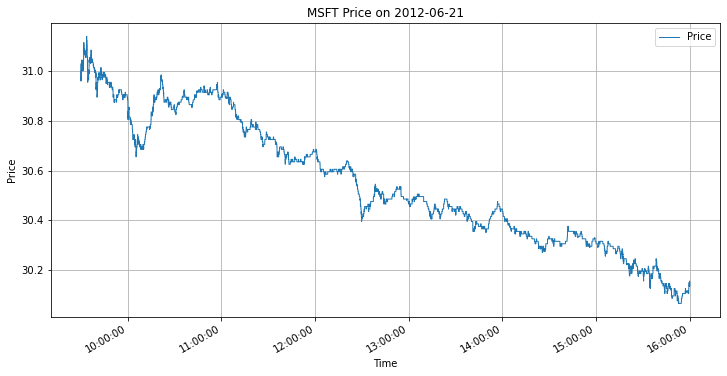

In [9]:
# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(merged_data['Time'], merged_data['midprice'], label="Price", linewidth=1)
plt.xlabel("Time")
plt.ylabel("Price")
plt.title(f"{ticker} Price on 2012-06-21")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
plt.xticks(rotation=45)
plt.gcf().autofmt_xdate()
plt.grid(True)
plt.legend()
plt.show()

In [10]:
spread_counts = merged_data['spread'].value_counts().sort_index()
print(spread_counts)

0.01    514031
0.02    154338
0.03       345
0.04        49
0.05         1
Name: spread, dtype: int64


In [11]:
merged_data['bid_move'] = np.round(merged_data['bid_price_1'].diff(), 4)
bid_move_counts = merged_data['bid_move'].value_counts().sort_index()
print(bid_move_counts)

-0.02         1
-0.01      1034
 0.00    666777
 0.01       950
 0.04         1
Name: bid_move, dtype: int64


In [12]:
merged_data['ask_move'] = np.round(merged_data['ask_price_1'].diff(), 4)
ask_move_counts = merged_data['ask_move'].value_counts().sort_index()
print(ask_move_counts)

-0.02         7
-0.01      1071
 0.00    666689
 0.01       992
 0.02         4
Name: ask_move, dtype: int64


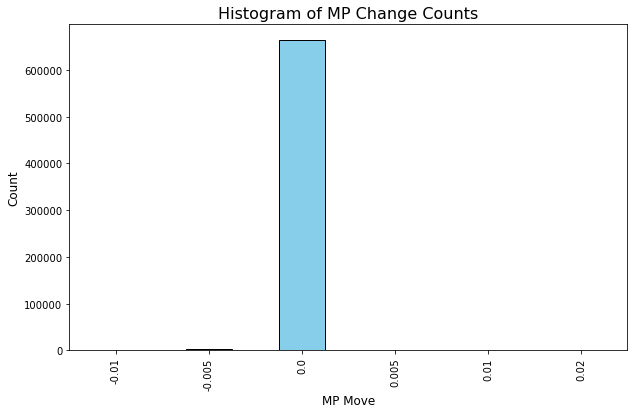

In [13]:
merged_data['mp_move'] = np.round(merged_data['midprice'].diff(), 4)
mp_change_counts = merged_data['mp_move'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
mp_change_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Histogram of MP Change Counts', fontsize=16)
plt.xlabel('MP Move', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

In [14]:
print(mp_change_counts.to_string())

-0.010         8
-0.005      2105
 0.000    664703
 0.005      1942
 0.010         4
 0.020         1
